# РИМ-181228
## Методы обработки изображений 
## Секлецов Д.И.

### Изменение разрешения изображения

(60, 80, 3)


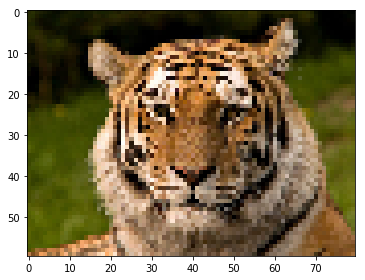

In [69]:
from skimage.io import imread, imshow,imsave
from skimage.transform import resize
img=imread('tiger.png')
img_copy = img.copy()
h=img_copy.shape[0]
w=img_copy.shape[1]
#изменение разрешения изображения
img_copy=resize(img_copy, (h//10, w//10)) 
print(img_copy.shape)
imshow(img_copy)

### Меняем цвет центральных пикселей

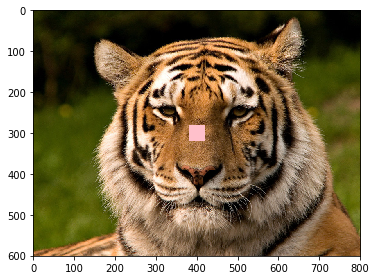

In [70]:
img_copy1 = img.copy()
img_copy1[h//2-20:h//2+20,w//2-20:w//2+20]=[255,192,203]
imshow(img_copy1)

### Определение рамки изображения

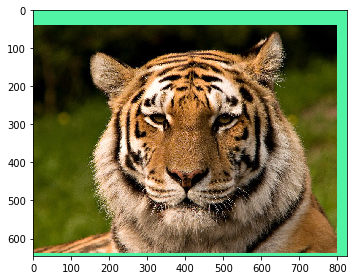

In [136]:
rimg=imread('tiger-border (1).png')
imshow(rimg)

h=rimg.shape[0]-1
w=rimg.shape[1]-1
xs=w//2
ys=h//2

In [137]:
h,w

(645, 825)

In [138]:
x1,x2,x3,x4 = [0]*4

In [139]:
for i in range(w):
    if all(rimg[0,0]!=rimg[xs,i]):
        break
    x1+=1
for i in range(h):
    if all(rimg[0,0]!=rimg[i,ys]):
        break
    x2+=1
for i in range(w):
    if all(rimg[0,0]!=rimg[xs,w-i]):
        break
    x3+=1
for i in range(h):
    if all(rimg[0,0]!=rimg[h-i,ys]):
        break
    x4+=1

In [140]:
x1,x2,x3,x4 # рамка


(1, 39, 25, 7)

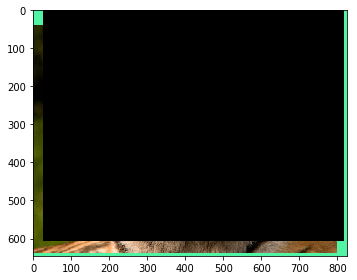

In [130]:
rimg[x1:h-x2,x3:w-x4]=[0,0,0]
imshow(rimg)

### Вычисление негатива изображения

In [141]:
from numpy import dstack

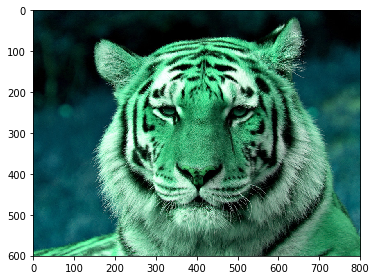

In [145]:
pimg=imread('tiger.png')

r=pimg[:,:,0]
g=pimg[:,:,1]
b=pimg[:,:,2]

imshow(dstack((b,r,g)))

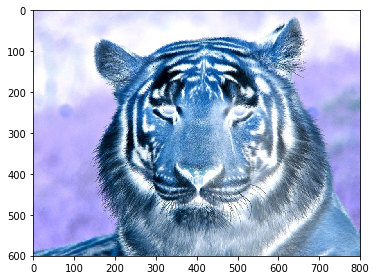

In [146]:
rn=255-r
gn=255-g
bn=255-b

imshow(dstack((rn,gn, bn)))

### Сопоставление фотографий Прокудина-Горского

In [152]:
from skimage.io import imread, imshow, imsave
from skimage.transform import resize
from numpy import roll, dstack
from skimage import img_as_float

In [153]:
def find_shift(channel, target, border):
    return roll(channel,sorted({(i,j):(roll(channel,(i,j),(0,1))*target).sum() for j in range(-1*border,border,1) for i in range(-1*border,border,1)}.items(), key=lambda x: x[1], reverse=True)[0][0],(0,1))

In [154]:
def find_shift ( channel, target, border ):
#     h = target.shape[0]
#     w = target.shape[1]
#     d = int ( 0.07 * w )
#     target = target[ d : h - d, d : w - d ]
    corr = 0
    for i in range( -1 * border, border, 1 ):
        for j in range( -1 * border, border, 1 ):
            shifted = roll( channel, ( i, j ), (0, 1))
#             shifted = shifted[ d : h - d, d : w - d ]
            c = ( shifted * target ).sum()
            if c > corr:
                corr = c
                best_i = i
                best_j = j
    return roll ( channel, (best_i, best_j), (0,1) )

In [155]:
def prokudin_gorsky(file):
    original_pg=imread(file)
    original_pg=img_as_float(original_pg)
    original_pg.shape

    h=original_pg.shape[0]
    w=original_pg.shape[1]

    a=int(h//3)
    d=int(0.07*w)

    b=original_pg[d:a-d,d:w-d]
    g=original_pg[a+d:2*a-d,d:w-d]
    r=original_pg[2*a+d:3*a-d,d:w-d]
   
    sr=find_shift(r,b,15)
    sg=find_shift(g,b,15)

    imshow(dstack((sr,sg,b)))

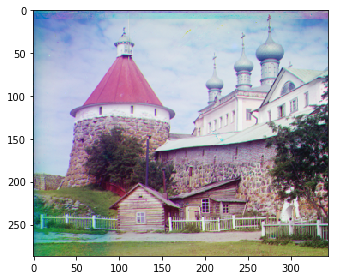

In [156]:
prokudin_gorsky('01.png')

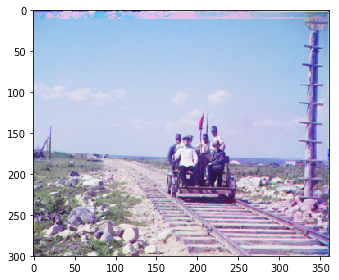

In [158]:
prokudin_gorsky('00.png')

### Автоконтраст черно-белого изображения

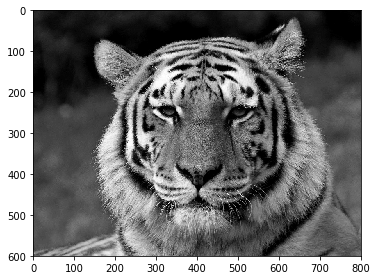

In [160]:
from skimage.io import imread, imshow,imsave
img = imread('tiger-low-contrast.png')
Xmin=min(img.ravel())
Xmax=max(img.ravel())
k=255/(Xmax-Xmin)
imgN=((img-Xmin)*k).astype('uint8')
imsave('out_img.png',imgN)
imshow('out_img.png')

### Устойчивый автоконтраст черно-белого изображения 

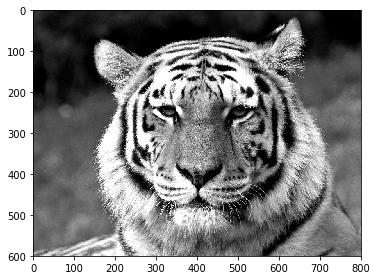

In [163]:
from skimage.io import imread,imsave
from numpy import clip
img=imread('tiger-low-contrast (1).png')
img=img.astype('float')
pixel=img.shape[0]*img.shape[1]
k=round(pixel*0.05)
L=img.copy()
L=L.ravel()
L.sort()
Xmin=L[k]
Xmax=L[pixel-k]

t=255/(Xmax-Xmin)
imgN=(img-Xmin)*t

imgN=clip(imgN,0,255)
img=imgN.astype('uint8')
imsave('out_img.png',img)
imshow(img)

### Устойчивый цветной автоконтраст

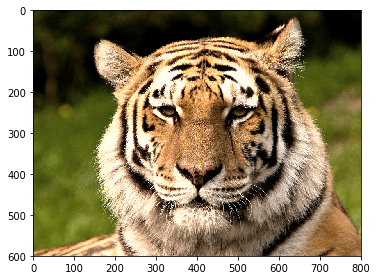

In [166]:
from skimage.io import imread,imsave
from skimage import img_as_float, img_as_ubyte
from numpy import clip,dstack
img=imread('tiger-color 2.png')
img_f=img_as_float(img)
R = img_f[:,:,0]
G = img_f[:,:,1]
B = img_f[:,:,2]


Y =  0.2126*R+0.7152*G+0.0722*B
U = -0.0999*R-0.3360*G+0.4360*B
V =  0.6150*R-0.5586*G-0.0563*B

pixel=img_f.shape[0]*img_f.shape[1]
k=round(pixel*0.05)
L=Y.copy()
L=L.ravel()
L.sort()
Xmin=L[k]
Xmax=L[pixel-k]
t=1/(Xmax-Xmin)
Y=(Y-Xmin)*t
Y=clip(Y,0,1)
R=Y+1.2803*V
G=Y-0.2148*U-0.3805*V
B=Y+2.1279*U

img_N = dstack((R,G,B))
img_N=clip(img_N,0,1)
img_N=img_as_ubyte(img_N)
imsave('out_img.png',img_N)
imshow(img_N)

### Преобразование серого мира

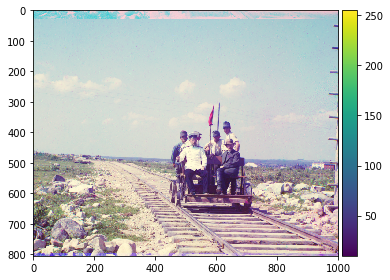

In [169]:
import numpy as np
img=imread('railroad.png')
img= img.astype('float')
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]
avg = (np.mean(r.ravel())+np.mean(g.ravel())+np.mean(b.ravel()))/3
rw = np.mean(r.ravel())/avg
gw = np.mean(g.ravel())/avg
bw = np.mean(b.ravel())/avg
r=r/rw
g=g/gw
b=b/bw
img_comb=dstack((r,g,b))
img_comb=clip(img_comb,0,255)
img_comb=img_comb.astype('uint')
imshow(img_comb)


### Выравнивание гистограммы

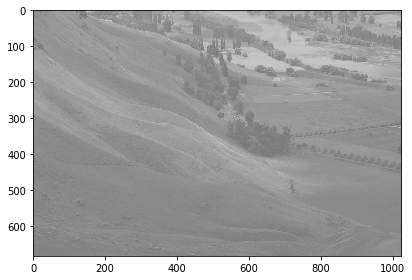

In [170]:
img1= imread('landscape.png')
imshow(img1)

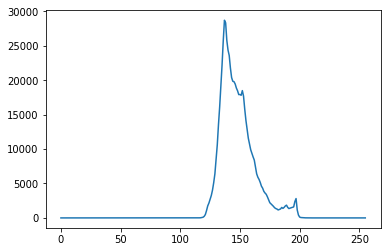

In [172]:
hist = np.zeros(256,np.int32)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        value=img1[i][j]
        hist[value]+=1
from matplotlib import pyplot as plt
plt.plot(hist)

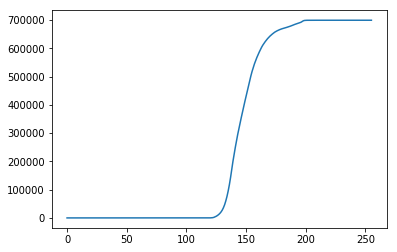

In [173]:
cdf = np.zeros(256,np.int32)
for i in range(256):
    cdf[i]=sum(hist[0:i])
plt.plot(cdf)

In [174]:
img_hist=np.zeros((img1.shape[0],img1.shape[1]))
cdf_min=min(cdf>0)

for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        x=img1[i][j]
        img_hist[i][j]=round((cdf[x]-cdf_min)/(img1.shape[0]*img.shape[1]-1)*256)

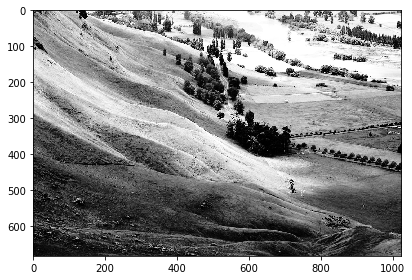

In [175]:
img_hist=clip(img_hist,0,255)
img_hist=img_hist.astype('uint8')
imshow(img_hist)

## Фильтрация изображений


### Box фильтр 

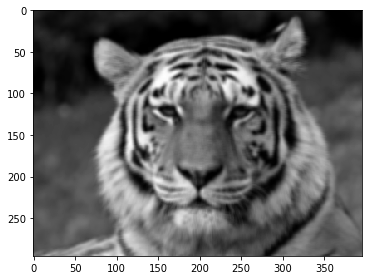

In [176]:
from skimage.io import imread, imshow,imsave
import numpy as np 
from skimage.transform import integrate, integral_image
img = imread('tiger-gray-small.png')
img = integral_image(img)*4
n = img.shape[0]-4
m = img.shape[1]-4
img_box = np.zeros([n,m],np.uint32)

for i in range(n):
    for j in range(m):
        img_box[i,j]=integrate(img,(i,j),(i+4,j+4))
img_box=np.uint8(img_box//100)
imsave('out_img.png',img_box)
imshow(img_box)

### Подсчет функции Гаусса


In [1]:
# put your python code here
from math import exp, pi
s,x,y = (int(i) for i in input().split())
d=1/(2*pi*s**2)*exp((-x**2-y**2)/(2*s**2))
print(d)

1 4 6
8.131367735128454e-13


### Ядро Гауссовского фильтра



In [1]:
from math import exp,pi
import numpy as np
s= float(input())
def g(s,x,y):
    return (1/(2*pi*s**2)*exp((-x**2-y**2)/(2*s**2)))
k=round(s*3*2+1)
n = k//2
a = np.zeros((k,k))
d = 0 
for i in range (-n,n+1):
    for j in range(-n,n+1):
        a[i+n,j+n] = g(s,i,j)
d = 1/sum(sum(a))
an = a*d 
for i in an:
    for j in i:
        print(round(j,5),end=' ')
    print('')

0.33
0.0001 0.00974 0.0001 
0.00974 0.96065 0.00974 
0.0001 0.00974 0.0001 


### Гауссовская фильтрация 

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


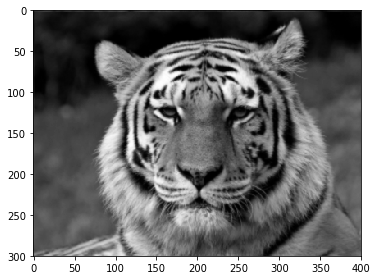

In [3]:
from math import exp,pi
import numpy as np
from numpy import clip
from skimage.io import imread, imshow,imsave
from skimage.transform import integrate, integral_image

s= 0.66
d = 0 
def g(s,x,y):
    return (1/(2*pi*s**2)*exp((-x**2-y**2)/(2*s**2)))
k=round(s*3*2+1)
nn = k//2
a = np.zeros((k,k))

for i in range (-nn,nn+1):
    for j in range(-nn,nn+1):
        a[i+nn,j+nn] = g(s,i,j)
d = 1/sum(sum(a))
an = (a*d) 
an = np.around(an, decimals=5)

img = imread('tiger-gray-small.png')
img=img.astype('float')

def blur(a,kernel):
    arraylist = []
    for y in range(5):
        temparray = np.copy(a)
        temparray = np.roll(temparray, y - 1, axis=0)
        for x in range(5):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
            arraylist.append(temparray_X)

    arraylist = np.array(arraylist)
    arraylist_sum = np.sum(arraylist, axis=0)
    return arraylist_sum
itog = blur(img,an)
img=clip(itog,0,255)
img=img.astype('uint8')
imsave('out_img.png',img)
imshow(img)

### Медианный фильтр

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


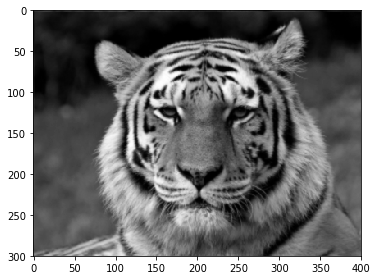

In [4]:
def median_filter():
    
    img = imread('tiger-gray-small.png')
    img=img.astype('float')
    filter_size=7
    temp = []
    indexer = filter_size // 2
    for i in range(len(img)):

        for j in range(len(img[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(img) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(img[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(img[i + z - indexer][j + k - indexer])

            temp.sort()
            img[i][j] = temp[len(temp) // 2]
            temp = []
    #imshow(img)        
    return img
a=median_filter()
imshow(img)

## Фильтры

In [5]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from skimage import filters
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data
%matplotlib inline

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


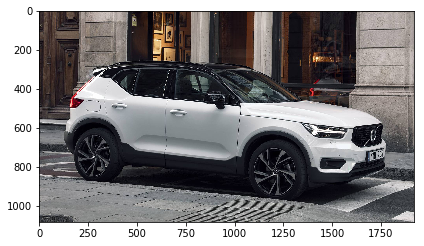

In [6]:
img = imread('xc40.jpg')
imshow(img)
plt.show()

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


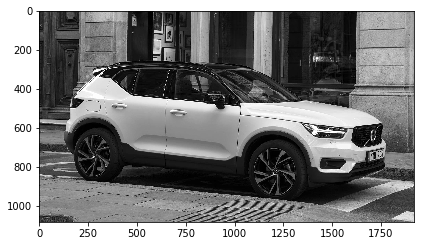

In [7]:
img2 = rgb2gray(img)
imshow(img2)

## Выделение границ

### Стандартный фильтр для выделения скачков яркости

In [8]:
kernel_Dx = np.array([[0, 0, 0], 
                     [-1, 0, 1], 
                     [0, 0, 0]])

kernel_Dy = np.array([[0, 1, 0], 
                     [0, 0, 0], 
                     [0, -1, 0]])

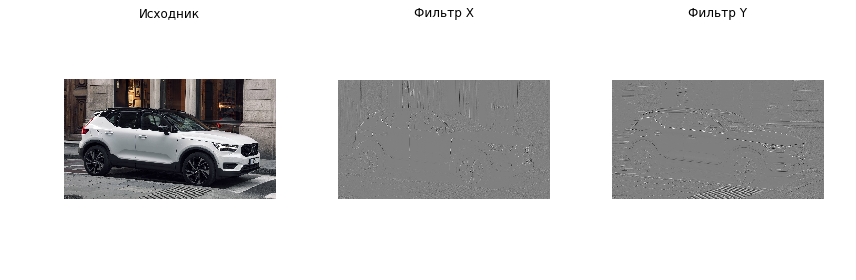

In [43]:
res_Dx = convolve2d(img2, kernel_Dx, mode = "valid")
res_Dy = convolve2d(img2, kernel_Dy, mode = "valid")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Исходник')

ax2.imshow(res_Dx, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Фильтр X')

ax3.imshow(res_Dy, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Фильтр Y')

fig.tight_layout()

plt.show()

### Фильтр Превитта

In [ ]:
kernel_Px = np.array([[-1, 0, 1], 
                     [-1, 0, 1], 
                     [-1, 0, 1]])

kernel_Py = np.array([[-1, -1, -1], 
                     [0, 0, 0], 
                     [1, 1, 1]])

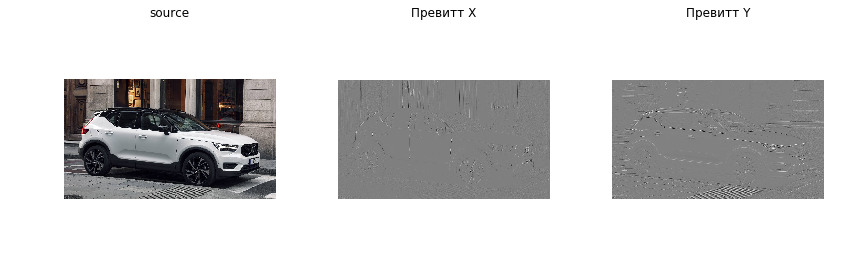

In [38]:
res_Px = convolve2d(img2, kernel_Px, mode = "valid")
res_Py = convolve2d(img2, kernel_Py, mode = "valid")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Исходник')

ax2.imshow(res_Px, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Превитт X')

ax3.imshow(res_Py, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Превитт Y')

fig.tight_layout()

plt.show()

### Фильтр Собеля

In [ ]:
kernel_Sx = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])

kernel_Sy = np.array([[-1, -2, -1], 
                     [0, 0, 0], 
                     [1, 2, 1]])

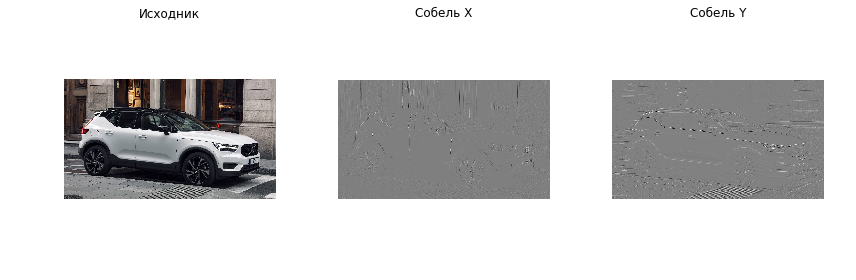

In [44]:
res_Sx = convolve2d(img2, kernel_Sx, mode = "valid")
res_Sy = convolve2d(img2, kernel_Sy, mode = "valid")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Исходник')

ax2.imshow(res_Sx, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Собель X')

ax3.imshow(res_Sy, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Собель Y')

fig.tight_layout()

plt.show()

### Дискретный оператор Лапласа

In [16]:
kernel_L1 = np.array([[0, 1, 0], 
                     [1, -4, 1], 
                     [0, 1, 0]])

kernel_L2 = np.array([[1, 1, 1], 
                     [1, -8, 1], 
                     [1, 1, 1]])

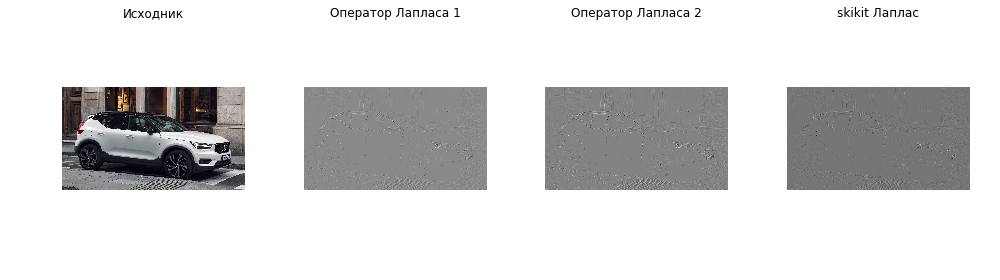

In [45]:
    res_L1 = convolve2d(img2, kernel_L1, mode = "valid")
    res_L2 = convolve2d(img2, kernel_L2, mode = "valid")
    res_SL = filters.laplace(img2, ksize = 3)
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(14, 4), sharex=True, sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Исходник')

    ax2.imshow(res_L1, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Оператор Лапласа 1')

    ax3.imshow(res_L2, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title('Оператор Лапласа 2')
    
    ax4.imshow(res_SL, cmap=plt.cm.gray)
    ax4.axis('off')
    ax4.set_title('skikit Лаплас')

    fig.tight_layout()

    plt.show()

## Другие фильтры

### Фильтр тиснения

In [22]:
kernel_E1 = np.array([[-2, 0, 0], 
                     [0, 1, 0], 
                     [0, 0, 2]])

kernel_E2 = np.array([[-2, -1, 0], 
                     [-1, 1, 1], 
                     [0, 1, 2]])

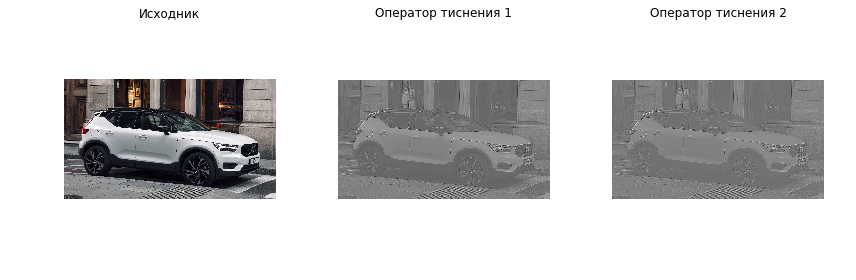

In [47]:
res_E1 = convolve2d(img2, kernel_E1, mode = "valid")
res_E2 = convolve2d(img2, kernel_E2, mode = "valid")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Исходник')

ax2.imshow(res_E1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Оператор тиснения 1')

ax3.imshow(res_E2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Оператор тиснения 2')

fig.tight_layout()

plt.show()

### Фильтр повышения контрастности

In [26]:
kernel_hc = np.array([[-1, -1, -1], 
                     [-1, 9, -1], 
                     [-1, -1, -1]])

In [27]:
def high_contrast(img):
    img = rgb2yuv(img)
    Y = img[:,:,0]
    U = img[:,:,1]
    V = img[:,:,2]
    
    Y = convolve2d(Y, kernel_hc, mode = "same") # переполнение
    U = convolve2d(U, kernel_hc, mode = "same")
    V = convolve2d(V, kernel_hc, mode = "same")
   
    img = np.dstack((Y,U,V))
    
    img = yuv2rgb(img) # переполнение
    
    img = np.clip(img, 0, 1)
    
    return img

In [28]:
res1 = high_contrast(img)
#много шума
res2 = filters.gaussian(img, multichannel=True)
res2 = high_contrast(res2)

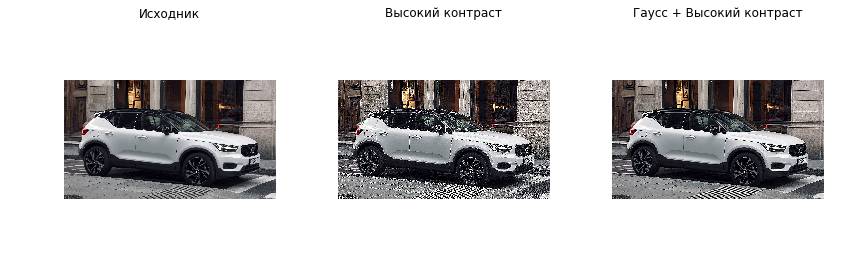

In [48]:
res_E1 = convolve2d(img2, kernel_E1, mode = "valid")
res_E2 = convolve2d(img2, kernel_E2, mode = "valid")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Исходник')

ax2.imshow(res1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Высокий контраст')

ax3.imshow(res2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Гаусс + Высокий контраст')

fig.tight_layout()

plt.show()